In [42]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Read the dataset
MS=pd.read_csv("Mall_Customers.csv")

In [44]:
#Print the 5 first rows
MS.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
#Print the infos about the dataset
MS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
#Drop  columns
MS.drop(columns="CustomerID", inplace=True)

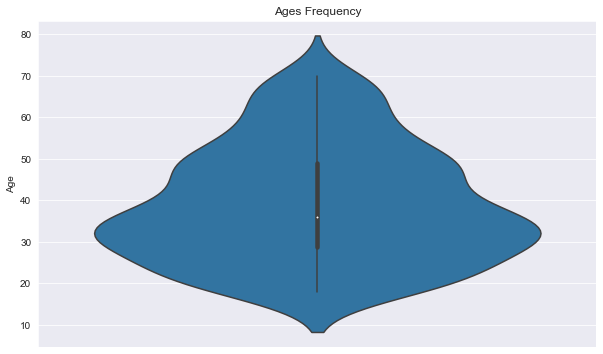

In [47]:
#print the violin plot
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=MS["Age"])
plt.show()

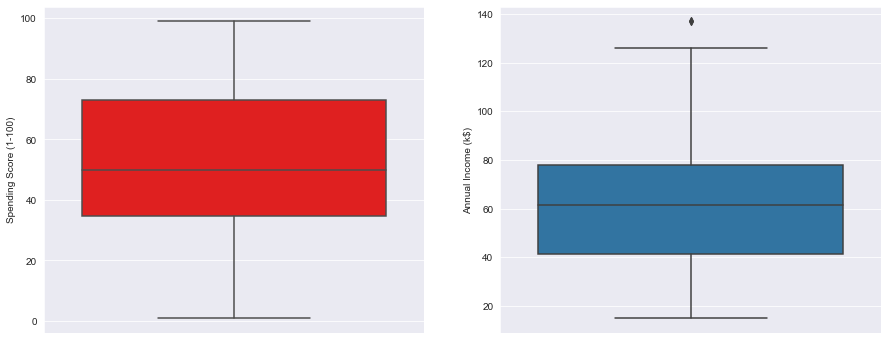

In [48]:
#print the boxplot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=MS["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=MS["Annual Income (k$)"])
plt.show()

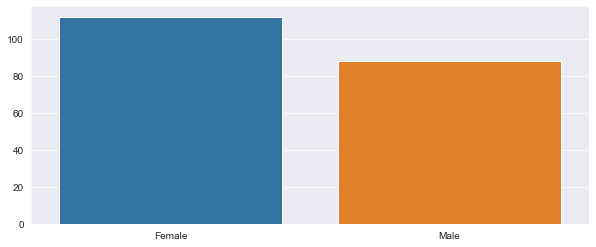

In [49]:
#Print the barplot
genders = MS.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

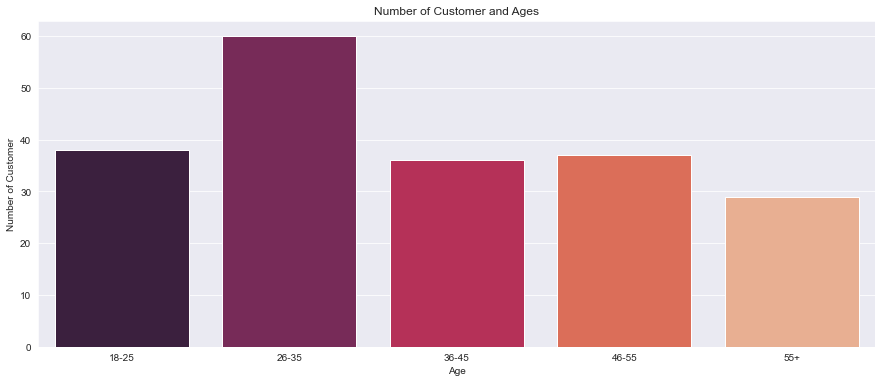

In [50]:
#Make some classes
age18_25 = MS.Age[(MS.Age <= 25) & (MS.Age >= 18)]
age26_35 = MS.Age[(MS.Age <= 35) & (MS.Age >= 26)]
age36_45 = MS.Age[(MS.Age <= 45) & (MS.Age >= 36)]
age46_55 = MS.Age[(MS.Age <= 55) & (MS.Age >= 46)]
age55above = MS.Age[MS.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
#print the barplot
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

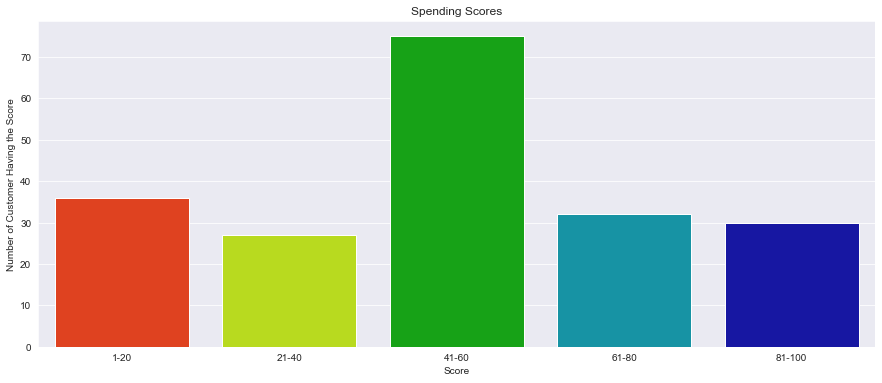

In [51]:

#Make  classes 
ss1_20 = MS["Spending Score (1-100)"][(MS["Spending Score (1-100)"] >= 1) & (MS["Spending Score (1-100)"] <= 20)]
ss21_40 = MS["Spending Score (1-100)"][(MS["Spending Score (1-100)"] >= 21) & (MS["Spending Score (1-100)"] <= 40)]
ss41_60 = MS["Spending Score (1-100)"][(MS["Spending Score (1-100)"] >= 41) & (MS["Spending Score (1-100)"] <= 60)]
ss61_80 = MS["Spending Score (1-100)"][(MS["Spending Score (1-100)"] >= 61) & (MS["Spending Score (1-100)"] <= 80)]
ss81_100 = MS["Spending Score (1-100)"][(MS["Spending Score (1-100)"] >= 81) & (MS["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
#Print the barplot
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

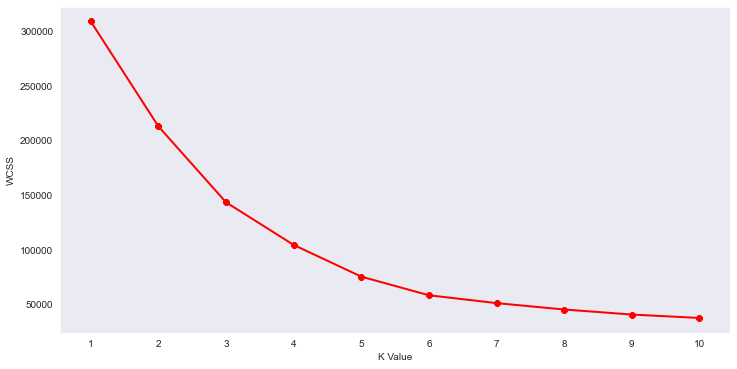

In [52]:
#Elbow method
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(MS.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

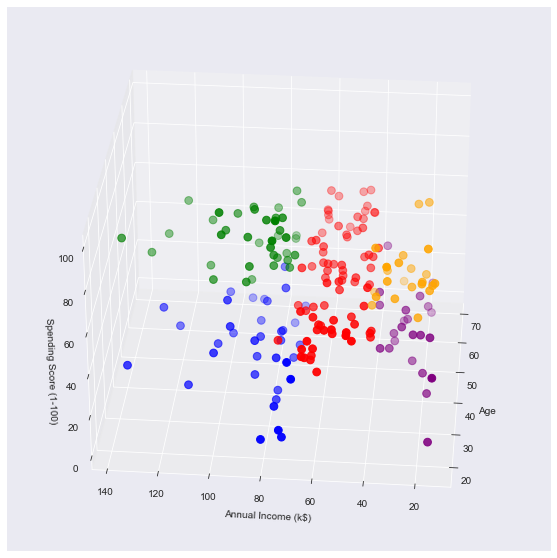

In [53]:
#Name the column label
km = KMeans(n_clusters=5)
clusters = km.fit_predict(MS.iloc[:,1:])
MS["label"] = clusters
#Importing the necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Print the different clusters using scatter plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MS.Age[MS.label == 0], MS["Annual Income (k$)"][MS.label == 0], MS["Spending Score (1-100)"][MS.label == 0], c='blue', s=60)
ax.scatter(MS.Age[MS.label == 1], MS["Annual Income (k$)"][MS.label == 1], MS["Spending Score (1-100)"][MS.label == 1], c='red', s=60)
ax.scatter(MS.Age[MS.label == 2], MS["Annual Income (k$)"][MS.label == 2], MS["Spending Score (1-100)"][MS.label == 2], c='green', s=60)
ax.scatter(MS.Age[MS.label == 3], MS["Annual Income (k$)"][MS.label == 3], MS["Spending Score (1-100)"][MS.label == 3], c='orange', s=60)
ax.scatter(MS.Age[MS.label == 4], MS["Annual Income (k$)"][MS.label == 4], MS["Spending Score (1-100)"][MS.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [54]:
#Print the head of the dataset
MS.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [55]:
# Rename the columns 
MS['clusters'] = MS["label"]
MS['clusters_L'] =MS['clusters'].apply(lambda x : f"Segment {int(x)+1}")

In [56]:
MS.to_csv("MS.csv")

In [41]:
MS.groupby(by="clusters_L").describe()

Age                                                        \
           count       mean        std   min    25%   50%    75%   max   
clusters_L                                                               
Segment 1   39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
Segment 2   80.0  42.937500  16.429630  18.0  27.00  46.5  54.25  70.0   
Segment 3   36.0  40.666667  11.496583  19.0  34.00  41.5  47.25  59.0   
Segment 4   22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   
Segment 5   23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   

           Annual Income (k$)             ... label      clusters            \
                        count       mean  ...   75%  max    count mean  std   
clusters_L                                ...                                 
Segment 1                39.0  86.538462  ...   0.0  0.0     39.0  0.0  0.0   
Segment 2                80.0  55.087500  ...   1.0  1.0     80.0  1.0  0.0   
Segment 3                36.0  87.750000  ...   2.0  2.0     36.0  2.0  0.0   
Segment 4                22.0  25.727273  ...   3.0  3.0     22.0  3.0  0.0   
Segment 5                23.0  26.304348  ...   4.0  4.0     23.0  4.0  0.0   

                                     
            min  25%  50%  75%  max  
clusters_L                           
Segment 1   0.0  0.0  0.0  0.0  0.0  
Segment 2   1.0  1.0  1.0  1.0  1.0  
Segment 3   2.0  2.0  2.0  2.0  2.0  
Segment 4   3.0  3.0  3.0  3.0  3.0  
Segment 5   4.0  4.0  4.0  4.0  4.0  

[5 rows x 40 columns]